In [190]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
%config InlineBackend.figure_format ='retina'

In [177]:
def process(row):
    row = str.replace(row, '[', '')
    row = str.replace(row, ']', '')
    lst = row.split()
    return np.array(lst).astype(np.float)

def parse_df(df):
    for column in df.columns:
        df[column] = df[column].apply(process)
    return df

In [178]:
def transform(df, cols=metrics):
    df = parse_df(df)
    means = df.sum()/len(df)
    
    res = pd.DataFrame(np.stack(means), columns=cols)
    res.index = means.index
    return res


def transform2(df, cols=metrics):
    df = parse_df(df)
        
    res = pd.DataFrame()
    for alg in df.columns:
        tmp = pd.DataFrame(np.stack(df[alg]), columns=cols)
        tmp = tmp.apply(lambda col: f"{col.mean():.3f} ± {col.std():.3f}")
        res = res.append(pd.DataFrame(tmp).transpose())
    res.index = df.columns
    return res

metrics = ['sil', 'ch', 'gd41', 'os']

In [185]:
def get_metric_stats(df, metric):
    
    metric_values = pd.DataFrame()
    
    for alg in df.columns:
        metric_values[alg] = df[alg].apply(lambda a: a[metrics.index(metric)])
    return metric_values

In [179]:
df = pd.read_csv("scores.csv")
res = transform(df, metrics)
# res.to_csv("real_data_mean_scores1.csv")

In [180]:
res

,sil,ch,gd41,os
k-means,0.395302,800.095880,0.059078,21.767142
lwea,0.124767,247.157940,0.034533,30.634760
monti,0.418044,625.724285,0.081594,127.670902
monti_fixed,0.348259,756.368104,0.047771,27.889698


In [181]:
df = pd.read_csv("synt_scores.csv")
res = transform(df, metrics)
# res.to_csv("synt_data_mean_scores1.csv")

In [182]:
res

,sil,ch,gd41,os
k-means,0.606793,1618.785967,0.038419,1.328350
lwea,0.380190,764.332597,0.020270,4.360719
monti,0.608744,782.135069,0.043501,8.228966
monti_fixed,0.605910,1617.709759,0.039255,1.331596
mv,0.609748,1299.324957,0.029591,1.630093


In [183]:
df = pd.read_csv("synt_scores.csv")
res = transform2(df, metrics)
# res.to_csv("synt_data_mean_std_scores.csv")

In [184]:
res

,sil,ch,gd41,os
k-means,0.607 ± 0.111,1618.786 ± 855.850,0.038 ± 0.038,1.328 ± 0.930
lwea,0.380 ± 0.166,764.333 ± 568.652,0.020 ± 0.013,4.361 ± 9.501
monti,0.609 ± 0.128,782.135 ± 1056.082,0.044 ± 0.036,8.229 ± 7.225
monti_fixed,0.606 ± 0.111,1617.710 ± 855.793,0.039 ± 0.038,1.332 ± 0.920
mv,0.610 ± 0.125,1299.325 ± 926.113,0.030 ± 0.019,1.630 ± 3.218


In [188]:
df = parse_df(pd.read_csv("synt_scores.csv"))

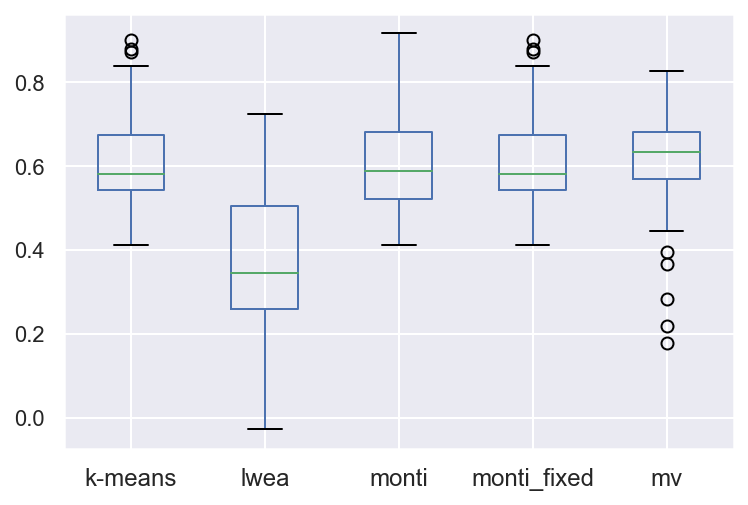

In [197]:
sils = get_metric_stats(df, 'sil')
sils.boxplot()

In [195]:
import seaborn as sns
sns.set()

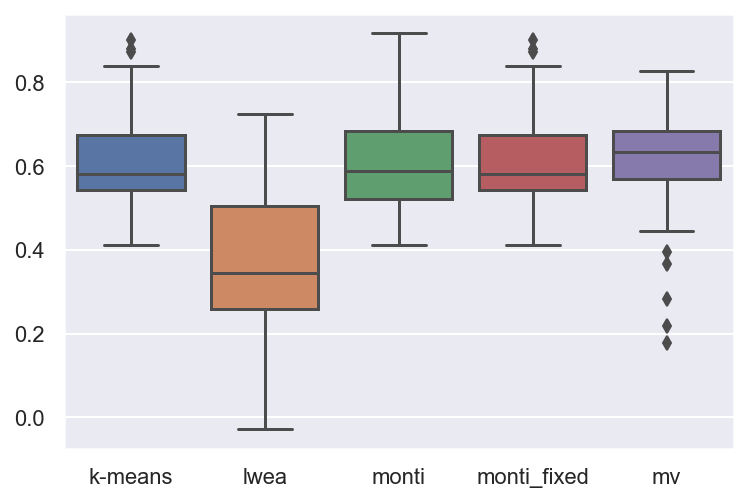

In [196]:
sns.boxplot(data=sils)